# Three Link Planar Jacobian in Frame 1

<img src="https://faculty.gvsu.edu/kraussry/445_images/learning_activities/jacobians/three_link_planar.jpeg" width=400px>

**Claim:** It is difficult to visualize what the singularity condition means for this robot if we look at the Jacobian in frame 3.

### Problem Statement - Part 1

- Find the singularity conditions for this robot based on the Jacobian in frame 3
- substitute the singularity condition into the frame 3 Jacobian and see what you can learn

**Note:** The problem starts below the typical imports.

### Typical Imports

In [113]:
import sympy
from sympy import Symbol, sin, cos, tan
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import robotics_sympy
from robotics_sympy import DH

In [114]:
L1, L2, th1, th2 = sympy.symbols(['L_1','L_2','theta_1','theta_2'])

In [115]:
th1

In [116]:
th1dot, th2dot = sympy.symbols(['\\dot{\\theta_1}','\\dot{\\theta_2}'])

In [117]:
th1dot

In [118]:
p90 = sympy.pi/2
n90 = -p90

In [119]:
sympy.sin(p90)

In [120]:
sympy.sin(n90)

In [121]:
alpha, a, th, d = sympy.symbols(['alpha','a','theta','d'])

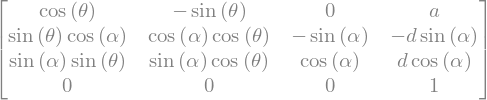

In [122]:
robotics_sympy.DH(alpha, a, th, d)

In [123]:
def J_row(v, theta_dots):
    row_list = []
    for theta_dot in theta_dots:
        #print("theta_dot = %s" % theta_dot)
        item = v.diff(theta_dot)
        row_list.append(item)
    return row_list

In [124]:
def find_J(vtip, theta_dots):
    J_list = []
    for v in vtip:
        cur_row = J_row(v,theta_dots)#<-- find the row of the Jacobian for vtip[0], vtip[1], ...
        J_list.append(cur_row)
    return sympy.Matrix(J_list)

In [125]:
def create_theta_dot_vect(thdot):
    return sympy.Matrix([[0],[0],[thdot]])

## The Jacobian in Frame 3

This is part of the answer to LA 12, feel free to use it to check your work.

In [78]:
L_1 = Symbol('L_1')
theta_2 = Symbol('theta_2')
theta_3 = Symbol('theta_3')
L_2 = Symbol('L_2')
L_3 = Symbol('L_3')
J3 = sympy.MutableDenseMatrix([[L_1*sin(theta_2 + theta_3) + L_2*sin(theta_3), L_2*sin(theta_3), 0], [L_1*cos(theta_2 + theta_3) + L_2*cos(theta_3) + L_3, L_2*cos(theta_3) + L_3, L_3], [1, 1, 1]])

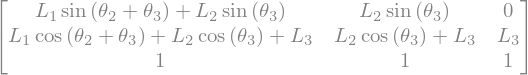

In [79]:
J3

- find the determinant for `J3`
- substitute the singularity condition back into `J3`
- see if you can learn/understand anything about the singularity condition

## Finding the Jacobian in Frame 1

### Problem Statement - Part 2

**Claim:** The Jacobian in Frame 1 will make it easier to understand the singularity condition for this robot.

**Approach:**  If we have $^3v_{tip}$, we need to find $^1v_{tip} in order to find the Jacobian in frame 1.

- Find the Jacobian in frame 1 and substitute the singularity condition to understand what the singularity means.



In [90]:
th1dot, th2dot, th3dot = sympy.symbols(['\\dot{\\theta_1}','\\dot{\\theta_2}', \
                                       '\\dot{\\theta_3}'])

In [91]:
L_1 = Symbol('L_1')
#th1dot = Symbol('th1dot')
theta_2 = Symbol('theta_2')
theta_3 = Symbol('theta_3')
L_2 = Symbol('L_2')
#th2dot = Symbol('th2dot')
L_3 = Symbol('L_3')
#th3dot = Symbol('th3dot')
v_tipf3 = sympy.MutableDenseMatrix([[L_1*th1dot*sin(theta_2 + theta_3) + L_2*th1dot*sin(theta_3) + L_2*th2dot*sin(theta_3)], [L_1*th1dot*cos(theta_2 + theta_3) + L_2*th1dot*cos(theta_3) + L_2*th2dot*cos(theta_3) + L_3*th1dot + L_3*th2dot + L_3*th3dot], [0]])

### From LA 12

This could also be helpful in checking your LA 12 answers:

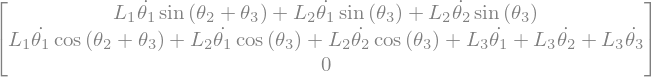

In [92]:
v_tipf3

In [93]:
wz = th1dot+th2dot+th3dot
wz